In [1]:
# initialize accelerator and trackers (if enabled)
from os import makedirs, path, scandir
import pickle
import cv2
import json
from yacs.config import CfgNode as CN
from torch.utils.data import Dataset
from tqdm import tqdm
import logging
import random
import torch
# from src.datasets import FFPP,RPPG
from accelerate import Accelerator
from main import get_config, init_accelerator, set_seed, FFPP
logging.basicConfig(level="DEBUG")


class Obj:
    pass


c = FFPP.get_default_config()
c.augmentation = "normal+frame"
# c.pair = 1
c.contrast = 1
c.compressions = ["c23"]
c.ssl_fake = 1
c.types = ["REAL", "DF", "FS", "F2F"]
# c.types = ["DF", "FS", "F2F"]
accelerator = Accelerator(mixed_precision='no')
x = FFPP(c, 20, 5, lambda x: x, accelerator, split="train")
c

/home/od/anaconda3/envs/dfd-clip/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| 4/4 [00:00<00:00, 2239.65it/s]
/home/od/anaconda3/envs/dfd-clip/lib/python3.8/site-packages/albumentations/core/composition.py:53: UserWarning: transforms is single transform, but a sequence is expected! Transform will be wrapped into list.
  warnings.warn(


CfgNode({'category': 'train', 'root_dir': './datasets/ffpp/', 'detection_level': 'video', 'types': ['REAL', 'DF', 'FS', 'F2F'], 'compressions': ['c23'], 'name': 'FFPP', 'scale': 1.0, 'pack': 0, 'pair': 0, 'contrast': 1, 'ssl_fake': 1, 'augmentation': ['normal', 'frame'], 'random_speed': 1})

In [2]:
typ, cmp, idx, _ = x.video_list[0]
x.video_table[typ][cmp][idx]

{'fps': 30,
 'frames': 453,
 'duration': 15.1,
 'path': './datasets/ffpp/real/c23/videos/071.avi'}

In [3]:
# a = x.get_dict(7079, True)

In [4]:
len(x)

8864

In [5]:
frames, label, mask, _, _ = x[random.randint(0, len(x))]
(len(frames), label, len(mask))

DEBUG:root:Item/Video Index:43/10
DEBUG:root:Item DF/COMP:REAL/c23
DEBUG:root:Video Speed Motion Factor: 0.8113600962020735
DEBUG:root:Video Shift Factor: 0.17940945143035114
DEBUG:root:Loading Video: ./datasets/ffpp/real/c23/videos/754.avi
DEBUG:root:Sample Offset: 5
DEBUG:root:Sample Stride: 0.2105263157894737
DEBUG:root:Augmentations Applied.
DEBUG:root:Video: ./datasets/ffpp/real/c23/videos/754.avi, Completed!
DEBUG:root:Random SSL Fake Samples Creating...
DEBUG:root:Item/Video Index:43/10
DEBUG:root:Item DF/COMP:REAL/c23
DEBUG:root:Video Speed Motion Factor: 0.591412617337158
DEBUG:root:Video Shift Factor: 0.34888863001311493
DEBUG:root:Loading Video: ./datasets/ffpp/real/c23/videos/754.avi
DEBUG:root:Sample Offset: 6
DEBUG:root:Sample Stride: 0.1526315789473684
DEBUG:root:Augmentations Applied.
DEBUG:root:SSL Make Fake Applied.
DEBUG:root:Video: ./datasets/ffpp/real/c23/videos/754.avi, Completed!


(2, [0, 1], 2)

DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/home/od/anaconda3/envs/dfd-clip/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/cmmi10.ttf', name='cmmi10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/home/od/anaconda3/envs/dfd-clip/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizFourSymReg.ttf', name='STIXSizeFourSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/home/od/anaconda3/envs/dfd-clip/lib/python3.8/s

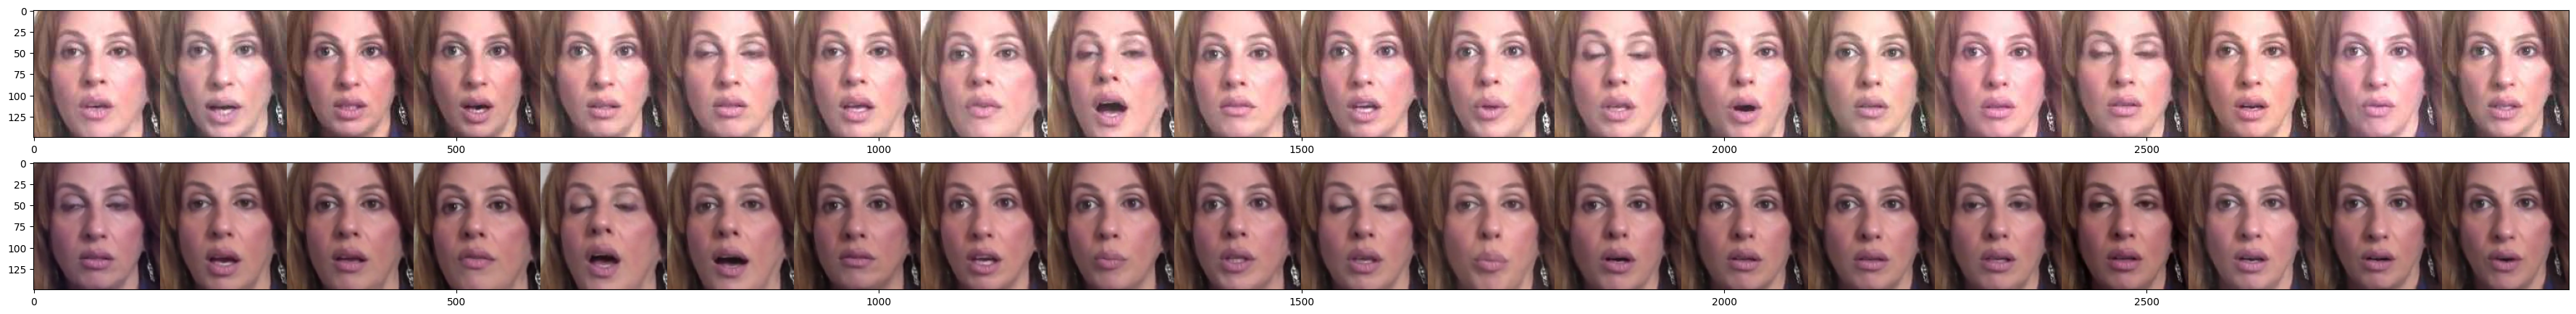

In [6]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(50, 5))
plt.subplot(2, 1, 1)
plt.imshow(
    np.stack(
        frames[0]["c23"][:30].numpy().transpose((0, 2, 3, 1)), axis=1
    ).reshape((150, -1, 3))
)
plt.subplot(2, 1, 2)
plt.imshow(
    np.stack(
        frames[1]["c23"][:30].numpy().transpose((0, 2, 3, 1)), axis=1
    ).reshape((150, -1, 3))
)

In [22]:
label

[0, 1]

In [ ]:
# for i in tqdm(range(len(x))):
#     try:
#         x[i]
#     except Exception as e:
#         print(f"Error Occur at {i}:{e}")